In [5]:
import json 
import glob
import os
import pymongo
# the file to be converted to  
# json format 
def create_data_list():
    path = 'D:/Data Science/Principles of Data Management/project/data/Disqus file'
    fileList = []
    for filename in os.listdir(path):
            #content = open(os.path.join(path, filename), 'r')
            fileList.append(filename)

    dictList = []
    print("Started Reading JSON file which contains multiple JSON document")
    for file in fileList:
        with open(path + "/" + file) as f:
            for jsonObj in f:
                d = json.loads(jsonObj)
                dictList.append(d)
    print(len(dictList))
    return dictList

In [3]:
def large_data():
    # the file to be converted to  
    # json format 
    
    path = 'D:/Data Science/Principles of Data Management/project/data/For Merge Disqus'
    fileList = []
    for filename in os.listdir(path):
            #content = open(os.path.join(path, filename), 'r')
            fileList.append(filename)

    dictList = []
    print("Started Reading JSON file which contains multiple JSON document")
    for file in fileList:
        with open(path + "/" + file) as f:
            for jsonObj in f:
                d = json.loads(jsonObj)
                dictList.append(d)
    print(len(dictList))
    return dictList

In [6]:
# dictList = create_data_list()
# largeList = large_data()
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

#First Database
# mydb = myclient["Project"]
# mycol = mydb["jsons"]
# x = mycol.insert_many(dictList)

# #Second Database
# mydb2 = myclient["bigProject"]
# mycol2 = mydb2["jsons"]
# y = mycol2.insert_many(largeList)

In [6]:
def q8():
    result = myclient['bigProject']['jsons'].aggregate([
        {
            '$unwind': {
                'path': '$response', 
                'preserveNullAndEmptyArrays': False
            }
        }, {
            '$match': {
                'response.author.id': {
                    '$ne': ''
                }
            }
        }, {
            '$group': {
                '_id': {
                    'responseID': '$response.id'
                }, 
                'response': {
                    '$first': '$response'
                }
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$response.author.id', 
                    'authorName': '$response.author.name'
                },  
                'avgLikes': {
                    '$avg': '$response.likes'
                }, 
                'avgDislikes': {
                    '$avg': '$response.dislikes'
                }
            }
        }, {
            '$sort': {
                'avgLikes': -1, 
                'avgDisikes': -1
            }
        }
    ], allowDiskUse = True)
    return result

In [7]:
result = q8()
for i in result:
    print(i)

{'_id': {'authorID': '17452698', 'authorName': 'LINER011'}, 'avgLikes': 727.0, 'avgDislikes': 0.0}
{'_id': {'authorID': '131413377', 'authorName': 'Alex'}, 'avgLikes': 397.0, 'avgDislikes': 0.0}
{'_id': {'authorID': '110434834', 'authorName': 'yup'}, 'avgLikes': 229.66666666666666, 'avgDislikes': 0.0}
{'_id': {'authorID': '283927074', 'authorName': 'Dark Knight'}, 'avgLikes': 199.0, 'avgDislikes': 1.0}
{'_id': {'authorID': '284417180', 'authorName': 'Disgusted'}, 'avgLikes': 192.0, 'avgDislikes': 0.0}
{'_id': {'authorID': '243945682', 'authorName': 'Philosophy14 ✓Identitarian'}, 'avgLikes': 184.0, 'avgDislikes': 0.0}
{'_id': {'authorID': '276155630', 'authorName': 'Jay'}, 'avgLikes': 147.25, 'avgDislikes': 0.125}
{'_id': {'authorID': '219318371', 'authorName': 'Trump Train aka Honey Badger'}, 'avgLikes': 129.4, 'avgDislikes': 0.0}
{'_id': {'authorID': '255680944', 'authorName': 'Frank Galvin'}, 'avgLikes': 128.0, 'avgDislikes': 0.0}
{'_id': {'authorID': '156852461', 'authorName': 'MSSM

In [8]:
import time
def count_mongo_time(query):
    start_time = time.time()
    query()
    return (time.time() - start_time)

In [20]:
print(count_mongo_time(q8))

2.0122666358947754


In [3]:
def q1():
    result = myclient['bigProject']['jsons'].aggregate(
    [
        {
            '$unwind': {
                'path': '$response'
            }
        }, {
            '$match': {
                'response.author.location': {
                    '$eq': ''
                }
            }
        }, {
            '$group': {
                '_id': {
                    'responseID': '$response.id'
                }, 
                'authorID': {
                    '$first': '$response.author.id'
                }, 
                'authorLocation': {
                    '$first': '$response.author.location'
                }, 
                'authorName': {
                    '$first': '$response.author.name'
                }
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$authorID', 
                    'authorName': '$authorName'
                }, 
                'authorName': {
                    '$first': '$authorName'
                }, 
                'authorID': {
                    '$first': '$authorID'
                }, 
                'authorLocation': {
                    '$first': '$authorLocation'
                }
            }
        }
    ])
    return result

In [7]:
result = q1()
for i in result:
    print(i)

{'_id': {'authorID': '156172173', 'authorName': 'Holly Lopez'}, 'authorName': 'Holly Lopez', 'authorID': '156172173', 'authorLocation': ''}
{'_id': {'authorID': '163367730', 'authorName': 'fed up tax payer'}, 'authorName': 'fed up tax payer', 'authorID': '163367730', 'authorLocation': ''}
{'_id': {'authorID': '292798692', 'authorName': 'Vassily Soubotinov'}, 'authorName': 'Vassily Soubotinov', 'authorID': '292798692', 'authorLocation': ''}
{'_id': {'authorID': '187047144', 'authorName': 'edbo'}, 'authorName': 'edbo', 'authorID': '187047144', 'authorLocation': ''}
{'_id': {'authorID': '279945150', 'authorName': 'Anti-Liberal'}, 'authorName': 'Anti-Liberal', 'authorID': '279945150', 'authorLocation': ''}
{'_id': {'authorID': '16174491', 'authorName': 'Beachhawk'}, 'authorName': 'Beachhawk', 'authorID': '16174491', 'authorLocation': ''}
{'_id': {'authorID': '198138202', 'authorName': 'XSWER'}, 'authorName': 'XSWER', 'authorID': '198138202', 'authorLocation': ''}
{'_id': {'authorID': '1688

In [25]:
print(count_mongo_time(q1))

1.0391340255737305


In [10]:
import numpy as np
def q6():
    result = myclient['bigProject']['jsons'].aggregate(
    [
        {
            '$unwind': {
                'path': '$response', 
                'preserveNullAndEmptyArrays': False
            }
        }, {
            '$addFields': {
                'parentNotNull': {
                    '$ifNull': [
                        '$response.parent', np.nan
                    ]
                }
            }
        }, {
            '$group': {
                '_id': {
                    'responseID': '$response.id'
                }, 
                'response': {
                    '$first': '$response'
                }, 
                'parentNotNull': {
                    '$first': '$parentNotNull'
                }
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$response.author.id', 
                    'authorName': '$response.author.name'
                }, 
                'responses': {
                    '$addToSet': {
                        'response': '$response', 
                        'parentNotNull': '$parentNotNull'
                    }
                }
            }
        }, {
            '$addFields': {
                'hasNotNull': {
                    '$sum': '$responses.parentNotNull'
                }
            }
        }, {
            '$match': {
                'hasNotNull': {
                    '$gt': 0
                }
            }
        }, {
            '$project': {
                'authorName': '$_id.authorName', 
                'authorID': '$_id.authorID'
            }
        }
    ], allowDiskUse = True)
    return result

In [41]:
result = q6()
j = 0
for i in result:
    print(i)
    j = j + 1
print(j)

{'_id': {'authorName': 'Jim'}, 'authorName': 'Jim'}
{'_id': {'authorName': 'elr'}, 'authorName': 'elr'}
{'_id': {'authorName': 'jim'}, 'authorName': 'jim'}
{'_id': {'authorID': '100058873', 'authorName': 'SkippingDog'}, 'authorName': 'SkippingDog', 'authorID': '100058873'}
{'_id': {'authorID': '100373116', 'authorName': 'prop8'}, 'authorName': 'prop8', 'authorID': '100373116'}
{'_id': {'authorID': '1004172', 'authorName': 'acumenata'}, 'authorName': 'acumenata', 'authorID': '1004172'}
{'_id': {'authorID': '100504178', 'authorName': 'Snipkokken Balsov'}, 'authorName': 'Snipkokken Balsov', 'authorID': '100504178'}
{'_id': {'authorID': '100767464', 'authorName': 'fortunateone71'}, 'authorName': 'fortunateone71', 'authorID': '100767464'}
{'_id': {'authorID': '100771150', 'authorName': 'Jenna María Domínguez'}, 'authorName': 'Jenna María Domínguez', 'authorID': '100771150'}
{'_id': {'authorID': '100866202', 'authorName': 'annoyed'}, 'authorName': 'annoyed', 'authorID': '100866202'}
{'_id': 

In [11]:
import numpy as np
def q7():
    result = myclient['bigProject']['jsons'].aggregate(
    [
        {
            '$unwind': {
                'path': '$response', 
                'preserveNullAndEmptyArrays': False
            }
        }, {
            '$addFields': {
                'parentNotNull': {
                    '$ifNull': [
                        '$response.parent', 0
                    ]
                }
            }
        }, {
            '$group': {
                '_id': {
                    'responseID': '$response.id'
                }, 
                'response': {
                    '$first': '$response'
                }, 
                'parentNotNull': {
                    '$first': '$parentNotNull'
                }
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$response.author.id', 
                    'authorName': '$response.author.name'
                }, 
                'responses': {
                    '$addToSet': {
                        'response': '$response', 
                        'parentNotNull': '$parentNotNull'
                    }
                }
            }
        }, {
            '$addFields': {
                'hasNotNull': {
                    '$sum': '$responses.parentNotNull'
                }
            }
        }, {
            '$match': {
                'hasNotNull': {
                    '$eq': 0
                }
            }
        }, {
            '$project': {
                'authorName': '$_id.authorName', 
                'authorID': '$_id.authorID'
            }
        }
    ], allowDiskUse = True)
    return result

In [45]:
result = q7()
j = 0
for i in result:
    print(i)
    j = j + 1
print(j)

{'_id': {'authorName': 'Frankspeakloud'}, 'authorName': 'Frankspeakloud'}
{'_id': {'authorName': 'Grim reaper'}, 'authorName': 'Grim reaper'}
{'_id': {'authorName': 'Jim Halloran'}, 'authorName': 'Jim Halloran'}
{'_id': {'authorID': '1001417', 'authorName': 'orlandocajun'}, 'authorName': 'orlandocajun', 'authorID': '1001417'}
{'_id': {'authorID': '100257222', 'authorName': 'j James'}, 'authorName': 'j James', 'authorID': '100257222'}
{'_id': {'authorID': '100414580', 'authorName': 'Lazarus the Deplorable'}, 'authorName': 'Lazarus the Deplorable', 'authorID': '100414580'}
{'_id': {'authorID': '100451391', 'authorName': 'Grinding Ax'}, 'authorName': 'Grinding Ax', 'authorID': '100451391'}
{'_id': {'authorID': '100452342', 'authorName': 'Justin McClure'}, 'authorName': 'Justin McClure', 'authorID': '100452342'}
{'_id': {'authorID': '100496192', 'authorName': 'Owl'}, 'authorName': 'Owl', 'authorID': '100496192'}
{'_id': {'authorID': '100530644', 'authorName': 'joecog'}, 'authorName': 'joec

In [12]:
def q5():
    result = myclient['bigProject']['jsons'].aggregate(
    [
        {
            '$unwind': {
                'path': '$response', 
                'preserveNullAndEmptyArrays': False
            }
        }, {
            '$group': {
                '_id': {
                    'responseID': '$response.id'
                }, 
                'authorID': {
                    '$first': '$response.author.id'
                }, 
                'authorName': {
                    '$first': '$response.author.name'
                }
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$authorID', 
                    'authorName': '$authorName'
                }, 
                'responseIDs': {
                    '$addToSet': {
                        'responseID': '$_id.responseID'
                    }
                }
            }
        }, {
            '$project': {
                'authorName': '$_id.authorName', 
                'authorID': '$_id.authorID', 
                'responseCount': {
                    '$size': '$responseIDs'
                }
            }
        }, {
            '$sort': {
                'responseCount': -1
            }
        },
        { '$limit': 10 }
    ])
    return result

In [50]:
result = q5()
for i in result:
    print(i)

{'_id': {'authorID': '288536631', 'authorName': 'StrayCat'}, 'authorName': 'StrayCat', 'authorID': '288536631', 'responseCount': 246}
{'_id': {'authorID': '150140509', 'authorName': 'Mortimer Snurd'}, 'authorName': 'Mortimer Snurd', 'authorID': '150140509', 'responseCount': 185}
{'_id': {'authorID': '292842000', 'authorName': 'ST HH'}, 'authorName': 'ST HH', 'authorID': '292842000', 'responseCount': 176}
{'_id': {'authorID': '294944884', 'authorName': 'nick supreme'}, 'authorName': 'nick supreme', 'authorID': '294944884', 'responseCount': 170}
{'_id': {'authorID': '118923992', 'authorName': 'US Navy'}, 'authorName': 'US Navy', 'authorID': '118923992', 'responseCount': 151}
{'_id': {'authorID': '233610691', 'authorName': 'Marine Assassin'}, 'authorName': 'Marine Assassin', 'authorID': '233610691', 'responseCount': 133}
{'_id': {'authorID': '280239772', 'authorName': 'mnnc'}, 'authorName': 'mnnc', 'authorID': '280239772', 'responseCount': 131}
{'_id': {'authorID': '324921053', 'authorNam

In [13]:
import re
def q3():
    result = myclient['bigProject']['jsons'].aggregate(
    [
        {
            '$unwind': {
                'path': '$response'
            }
        }, {
            '$match': {
                'response.message': re.compile(r".*Maybe.*(?i)")
            }
        }, {
            '$match': {
                'response.message': re.compile(r".*Trump.*(?i)")
            }
        }, {
            '$match': {
                'response.message': re.compile(r".*car.*(?i)")
            }
        }, {
            '$group': {
                '_id': {
                    'responseID': '$response.id'
                }, 
                'authorID': {
                    '$first': '$response.author.id'
                }, 
                'authorName': {
                    '$first': '$response.author.name'
                }, 
                'message': {
                    '$first': '$response.message'
                }
            }
        }
    ])
    return result

In [53]:
result = q3()
for i in result:
    print(i)

{'_id': {'responseID': '4189307169'}, 'authorID': '31116521', 'authorName': 'MaximusBraveheart', 'message': '<p>SCat, I hope nothing and happens today. Read this. What GHWB said those years ago set off alarm bells in me back then! Yikes: <a href="https://disq.us/url?url=https%3A%2F%2Fwww.silverdoctors.com%2Fheadlines%2Fworld-news%2Fwenkman-beware-november-11th-will-sunday-be-the-start-of-the-purge-of-the-patriots%2F%3AFdGbs-aTQUabZnXrsz-GncRGRgE&amp;cuid=1290197" rel="nofollow noopener" title="https://www.silverdoctors.com/headlines/world-news/wenkman-beware-november-11th-will-sunday-be-the-start-of-the-purge-of-the-patriots/">https://www.silverdoctors.c...</a></p><p>You just hate to read scary stuff like that. May God guide guide and protect us!</p><p>Trump is backing out of going today. Maybe a huge tragedy is planned to wipe out the world leaders? Snip." As David Rockefeller stated: “All we need is the right major crisis”. I believe we are just days away from this pre-engineered “ri

In [14]:
def q2():    
    result = myclient['bigProject']['jsons'].aggregate([
        {
            '$unwind': {
                'path': '$response'
            }
        }, {
            '$match': {
                'response.author.location': {
                    '$ne': ''
                }
            }
        }, {
            '$project': {
                'author': '$response.author'
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$author.id', 
                    'location': '$author.location', 
                    'username': '$author.username', 
                    'name': '$author.name', 
                    'joinedAt': '$author.joinedAt', 
                    'profileUrl': '$author.profileUrl'
                }
            }
        }, {
            '$project': {
                'child': '$$ROOT._id'
            }
        }, {
            '$lookup': {
                'from': 'AuthorsView', 
                'localField': 'child.location', 
                'foreignField': '_id.location', 
                'as': 'parent'
            }
        }, {
            '$unwind': {
                'path': '$parent', 
                'preserveNullAndEmptyArrays': False
            }
        }, {
            '$project': {
                'chusername': '$child.username', 
                'pusername': '$parent._id.username', 
                'location': '$child.location', 
                'chauthorID': '$child.authorID', 
                'pauthorID': '$parent._id.authorID', 
                'diff': {
                    '$subtract': [
                        {
                            '$toInt': '$child.authorID'
                        }, {
                            '$toInt': '$parent._id.authorID'
                        }
                    ]
                }
            }
        }, {
            '$match': {
                'diff': {
                    '$gt': 0
                }
            }
        }
    ])
    return result

In [ ]:
result = q2()
for i in result:
    print(i)

{'_id': {'authorID': '109474136', 'location': 'Flyover Country, USA', 'username': 'dropkick_1976', 'name': 'Dropkick', 'joinedAt': '2014-06-04T16:53:16', 'profileUrl': 'https://disqus.com/by/dropkick_1976/'}, 'chusername': 'dropkick_1976', 'pusername': 'Flyoverman', 'location': 'Flyover Country, USA', 'chauthorID': '109474136', 'pauthorID': '20185608', 'diff': 89288528}
{'_id': {'authorID': '244363355', 'location': 'USA', 'username': 'TDSAirborne', 'name': 'AllAmericanTDS', 'joinedAt': '2017-03-04T18:08:40', 'profileUrl': 'https://disqus.com/by/TDSAirborne/'}, 'chusername': 'TDSAirborne', 'pusername': 'disqus_NHoUdpAdha', 'location': 'USA', 'chauthorID': '244363355', 'pauthorID': '121767204', 'diff': 122596151}
{'_id': {'authorID': '244363355', 'location': 'USA', 'username': 'TDSAirborne', 'name': 'AllAmericanTDS', 'joinedAt': '2017-03-04T18:08:40', 'profileUrl': 'https://disqus.com/by/TDSAirborne/'}, 'chusername': 'TDSAirborne', 'pusername': 'Rufus_Conservative', 'location': 'USA', 'c

In [15]:
import re
def q4():
    result = myclient['bigProject']['jsons'].aggregate([
        {
            '$unwind': {
                'path': '$response'
            }
        }, {
            '$match': {
                'response.author.location': {
                    '$ne': ''
                }
            }
        }, {
            '$match': {
                'response.message': re.compile(r".*He.*(?i)")
            }
        },
            {
            '$project': {
                'author': '$response.author'
            }
        }, {
            '$group': {
                '_id': {
                    'authorID': '$author.id', 
                    'location': '$author.location', 
                    'username': '$author.username', 
                    'name': '$author.name', 
                    'joinedAt': '$author.joinedAt', 
                    'profileUrl': '$author.profileUrl'
                }
            }
        }, {
            '$project': {
                'child': '$$ROOT._id'
            }
        }, {
            '$lookup': {
                'from': 'AuthorsView', 
                'localField': 'child.location', 
                'foreignField': '_id.location', 
                'as': 'parent'
            }
        }, {
            '$unwind': {
                'path': '$parent', 
                'preserveNullAndEmptyArrays': False
            }
        }, {
            '$project': {
                'chusername': '$child.username', 
                'pusername': '$parent._id.username', 
                'location': '$child.location', 
                'chauthorID': '$child.authorID', 
                'pauthorID': '$parent._id.authorID', 
                'diff': {
                    '$subtract': [
                        {
                            '$toInt': '$child.authorID'
                        }, {
                            '$toInt': '$parent._id.authorID'
                        }
                    ]
                }
            }
        }, {
            '$match': {
                'diff': {
                    '$gt': 0
                }
            }
        }
    ])
    return result

In [11]:
result = q4()
j = 0
for i in result:
    print(i)
    j = j + 1
print(j)

{'_id': {'authorID': '137872791', 'location': 'Earth', 'username': 'disqus_rU3wTZwjxh', 'name': 'Jackalope', 'joinedAt': '2015-01-03T14:59:42', 'profileUrl': 'https://disqus.com/by/disqus_rU3wTZwjxh/'}, 'chusername': 'disqus_rU3wTZwjxh', 'pusername': 'memridotorg', 'location': 'Earth', 'chauthorID': '137872791', 'pauthorID': '112572963', 'diff': 25299828}
{'_id': {'authorID': '137872791', 'location': 'Earth', 'username': 'disqus_rU3wTZwjxh', 'name': 'Jackalope', 'joinedAt': '2015-01-03T14:59:42', 'profileUrl': 'https://disqus.com/by/disqus_rU3wTZwjxh/'}, 'chusername': 'disqus_rU3wTZwjxh', 'pusername': 'GlobalConflictWatch', 'location': 'Earth', 'chauthorID': '137872791', 'pauthorID': '79174913', 'diff': 58697878}
{'_id': {'authorID': '137872791', 'location': 'Earth', 'username': 'disqus_rU3wTZwjxh', 'name': 'Jackalope', 'joinedAt': '2015-01-03T14:59:42', 'profileUrl': 'https://disqus.com/by/disqus_rU3wTZwjxh/'}, 'chusername': 'disqus_rU3wTZwjxh', 'pusername': 'themonkey69', 'location':

In [22]:
t1 = count_mongo_time(q1)
t2 = count_mongo_time(q2)
t3 = count_mongo_time(q3)
t4 = count_mongo_time(q4)
t5 = count_mongo_time(q5)
t6 = count_mongo_time(q6)
t7 = count_mongo_time(q7)
t8 = count_mongo_time(q8)
l = []
l.append(t1)
l.append(t2)
l.append(t3)
l.append(t4)
l.append(t5)
l.append(t6)
l.append(t7)
l.append(t8)
print(l)

[0.6621806621551514, 58.10060954093933, 1.6437830924987793, 73.73705863952637, 1.1380374431610107, 2.9681448936462402, 2.8549535274505615, 1.463871955871582]


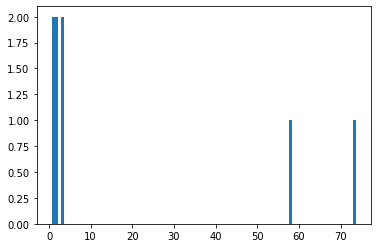

In [23]:
import matplotlib.pyplot as plt

plt.hist(l, bins = 100)
plt.show()

In [18]:
for i in range(5):
    t1 = count_mongo_time(q1)
for i in range(5):
    t2 = count_mongo_time(q2)
for i in range(5):
    t3 = count_mongo_time(q3)
for i in range(5):
    t4 = count_mongo_time(q4)
for i in range(5):
    t5 = count_mongo_time(q5)
for i in range(5):
    t6 = count_mongo_time(q6)
for i in range(5):
    t7 = count_mongo_time(q7)
for i in range(5):
    t8 = count_mongo_time(q8)
l1 = []
l1.append(t1)
l1.append(t2)
l1.append(t3)
l1.append(t4)
l1.append(t5)
l1.append(t6)
l1.append(t7)
l1.append(t8)
print(l1)

[0.9394199848175049, 138.19409012794495, 1.3736765384674072, 100.71812987327576, 1.107560396194458, 3.2913432121276855, 2.842294216156006, 1.4322149753570557]


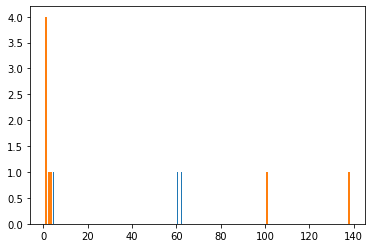

In [21]:
plt.hist(l, bins = 200)
plt.hist(l1, bins = 200)
plt.show()